<a href="https://colab.research.google.com/github/PedroDiehl/trabalho-ia/blob/main/TrabalhoIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho de Inteligência Artificial
## Universidade Federal de Pelotas
### Engenharia de Controle e Automação
### Professor: Elmer A. G. Peñaloza
### Grupo: Miguel Berno, Pedro Diehl e Rafael Trommer

# Processo do Machine Learning

---



O trabalho foi desenvolvido seguindo o fluxograma abaixo

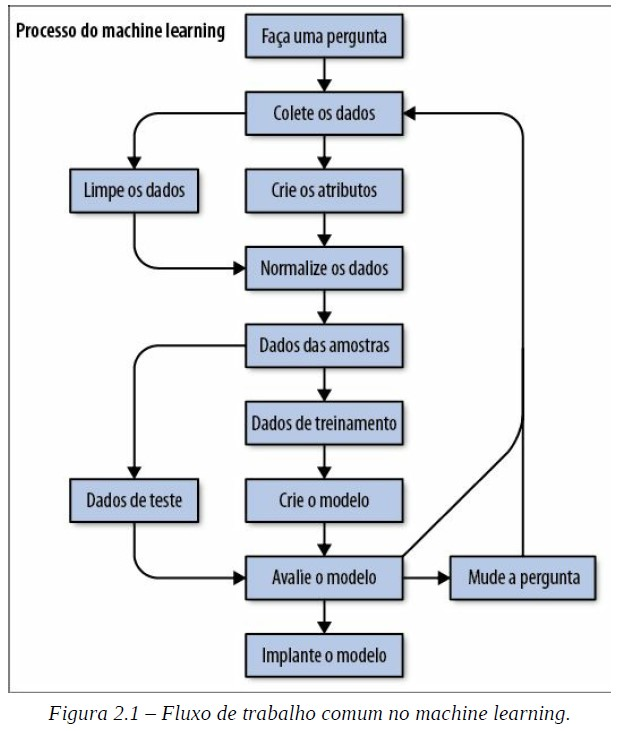

De acordo com Machine Learning - Guia de referência rápida - Trabalhando com dados estruturados em Python

# Faça uma pergunta


## Problemática enfrentada

# Colete os dados

---



## [Banco de dados utilizado](https://archive.ics.uci.edu/ml/datasets/combined+cycle+power+plant)
O conjunto de dados contém 9.568 pontos de dados coletados de uma usina de ciclo combinado ao longo de 6 anos (2006-2011), quando a usina foi configurada para funcionar com carga total.


Uma usina de ciclo combinado (*Combined Cycle Power Plant* - CCPP) é composta por turbinas a gás (GT), turbinas a vapor (ST) e geradores de vapor com recuperação de calor. Em um CCPP, a eletricidade é gerada por turbinas a gás e a vapor, que são combinadas em um ciclo, e é transferida de uma turbina para outra.

## Informações dos atributos
Os recursos consistem em variáveis de ambiente médias por hora
- Temperatura (T) na faixa de 1,81°C e 37,11°C,
- Pressão Ambiente (AP) na faixa de 992,89-1033,30 milibar,
- Umidade relativa (UR) na faixa de 25,56% a 100,16%
- Vácuo de exaustão (V) na faixa de 25,36-81,56 cm Hg
- Produção de energia elétrica horária líquida (EP) 420,26-495,76 MW


As médias são tiradas de vários sensores localizados ao redor da planta que registram as variáveis ambientais a cada segundo. 

**As variáveis são dadas sem normalização.**

## Artigos utilizando o banco de dados do trabalho

Pınar Tüfekci, Prediction of full load electrical power output of a base load operated combined cycle power plant using machine learning methods, International Journal of Electrical Power & Energy Systems, Volume 60, September 2014, Pages 126-140, ISSN 0142-0615, [Science Direct](https://linkinghub.elsevier.com/retrieve/pii/S0142061514000908).

Heysem Kaya, Pınar Tüfekci , Sadık Fikret Gürgen: Local and Global Learning Methods for Predicting Power of a Combined Gas & Steam Turbine, Proceedings of the International Conference on Emerging Trends in Computer and Electronics Engineering ICETCEE 2012, pp. 13-18 (Mar. 2012, Dubai)
## Biblioteca [pandas](https://pandas.pydata.org/docs/#) 
É uma biblioteca de código aberto licenciada pela BSD que fornece estruturas de dados fáceis de usar e de alto desempenho além de ferramentas de análise de dados para a linguagem de programação Python.


In [1]:
import pandas as pd


DATASET_URL = "https://raw.githubusercontent.com/PedroDiehl/trabalho-ia/main/Dataset/CCPP_dataset.csv"

df = pd.read_csv(DATASET_URL, sep=';')


print(df.shape)
df.head()

(9568, 5)


,TEMPERATURE,EXHAUST VACUUM,AMBIENT PRESSURE,RELATIVE HUMIDITY,ENERGY OUTPUT
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


# Limpe os dados

---



Primeiramente, realizou-se uma renomeação das colunas para aumentar a clareza na hora de manipular as informações contidas no dataset utilizado.

## Biblioteca [janitor](https://pyjanitor-devs.github.io/pyjanitor/)
É uma implementação Python do janitor do pacote R e fornece uma API para limpar os dados.

Utilizada para atribuir nomes corretos para as colunas.

Utilizado para ter uma visão de dados faltantes nas colunas.


## Biblioteca [ydata_profiling](https://pypi.org/project/pandas-profiling/)
O principal objetivo é fornecer uma experiência de análise exploratória de dados (EDA) de uma linha em uma solução consistente e rápida. Como a função pandas df.describe(), que é tão útil, o ydata-profiling oferece uma análise estendida de um DataFrame enquanto permite que a análise de dados seja exportada em diferentes formatos, como html e json.

O pacote gera uma análise simples e resumida de um conjunto de dados, incluindo séries temporais e texto.

# Crie os atributos

---


O banco de dados escolhidos possui todos os campos com atributos utilizáveis e relacionáveis, isso pode ser percebido ao analisar o relatório gerado pelo ydata_profiling.


In [2]:
!pip install pyjanitor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import janitor as jn


df = jn.clean_names(df)

if not df.isna().any().any():
  print("Dataframe sem valores ausentes")
else:
  print("Dataframe possui valores ausentes")

df.head()

Dataframe sem valores ausentes


,temperature,exhaust_vacuum,ambient_pressure,relative_humidity,energy_output
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [4]:
!pip install ydata_profiling

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
from ydata_profiling import ProfileReport

full_report = False #@param {type:"boolean"}

if full_report:
  ProfileReport(df, title="CCPP Profiling Report").to_notebook_iframe()
else:
  print(df.describe())

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


       temperature  exhaust_vacuum  ambient_pressure  relative_humidity  \
count  9568.000000     9568.000000       9568.000000        9568.000000   
mean     19.651231       54.305804       1013.259078          73.308978   
std       7.452473       12.707893          5.938784          14.600269   
min       1.810000       25.360000        992.890000          25.560000   
25%      13.510000       41.740000       1009.100000          63.327500   
50%      20.345000       52.080000       1012.940000          74.975000   
75%      25.720000       66.540000       1017.260000          84.830000   
max      37.110000       81.560000       1033.300000         100.160000   

       energy_output  
count    9568.000000  
mean      454.365009  
std        17.066995  
min       420.260000  
25%       439.750000  
50%       451.550000  
75%       468.430000  
max       495.760000  


# Normalize os dados

---


Também chamado de pré-processar os dados, ajuda muitos modelos a terem um melhor desempenho depois, principalmente para aqueles que dependem de métricas de distância para determinar semelhança.


Padronizar signinifica traduzir os dados de modo que tenham um valor de média igual a zero e desvio-padrão igual a 1. Desse modo os, os modelos não tratarão as variáveis com escalas maiores como mais importantes que as variáveis com menor escala.

# Biblioteca [sklearn](https://scikit-learn.org/stable/index.html)
É uma biblioteca de aprendizado de máquina em código aberto para a linguagem de programação Python. Fornece uma ampla gama de ferramentas para modelagem de dados e análise preditiva através de uma interface consistente.

# [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
Esse método calcula a média e o desvio padrão dos atributos e, em seguida, aplica a transformação para obter os valores padronizados. 

Para cada atributo $X$, o valor padronizado Z é calculado pela fórmula $Z = \frac{X - u}{s}$, onde $u$ é a média e $s$ é o desvio padrão do atribtuo.

In [6]:
from sklearn.preprocessing import StandardScaler


'''
# Escalonar em um intervalo, traduz os dados de modo que estejam entre 0 e 1
# Ter os dados limitados pode ser conveniente 
# Todavia, pode haver problema para o caso de valores discrepantes 


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
'''


scaler = StandardScaler()

data_normalized = scaler.fit_transform(df)

df[list(df.columns)] = pd.DataFrame(data_normalized, columns=list(df.columns))


print(df.describe())
df

        temperature  exhaust_vacuum  ambient_pressure  relative_humidity  \
count  9.568000e+03    9.568000e+03      9.568000e+03       9.568000e+03   
mean  -1.845421e-16   -1.927110e-16      5.472211e-15      -3.375227e-16   
std    1.000052e+00    1.000052e+00      1.000052e+00       1.000052e+00   
min   -2.394126e+00   -2.277901e+00     -3.430019e+00      -3.270589e+00   
25%   -8.240958e-01   -9.888705e-01     -7.003615e-01      -6.836860e-01   
50%    9.309729e-02   -1.751604e-01     -5.373067e-02       1.141150e-01   
75%    8.143721e-01    9.627745e-01      6.737290e-01       7.891378e-01   
max    2.342804e+00    2.144779e+00      3.374760e+00       1.839173e+00   

       energy_output  
count   9.568000e+03  
mean   -1.771901e-15  
std     1.000052e+00  
min    -1.998406e+00  
25%    -8.563765e-01  
50%    -1.649474e-01  
75%     8.241478e-01  
max     2.425568e+00  


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,temperature,exhaust_vacuum,ambient_pressure,relative_humidity,energy_output
0,-0.629519,-0.987297,1.820488,-0.009519,0.521208
1,0.741909,0.681045,1.141863,-0.974621,-0.585664
2,-1.951297,-1.173018,-0.185078,1.289840,2.003679
3,0.162205,0.237203,-0.508393,0.228160,-0.462028
4,-1.185069,-1.322539,-0.678470,1.596699,1.144666
...,...,...,...,...,...
9563,-0.402737,-0.363242,0.126450,1.211755,0.331944
9564,-0.867037,-1.190331,1.753131,-0.447205,0.893877
9565,1.565840,1.575811,-0.057099,-2.522618,-1.452881
9566,0.647976,1.191778,0.101191,-0.747901,-1.091345


# Separe as amostras

---


Sempre devemos efetuar o teste e treinamento em dados distintos. Caso contrário, não é possível saber realmente o quão bem seu modelo poderá ser generalizado para dados que ainda não tenham sido vistos.

In [7]:
X, y = jn.ml.get_features_targets(df, target_column_names="energy_output")

print("=========")
print("ATRIBUTOS")
print("=========\n")
print(X)

print("\n====")
print("ALVO")
print("====\n")
print(y)

ATRIBUTOS

      temperature  exhaust_vacuum  ambient_pressure  relative_humidity
0       -0.629519       -0.987297          1.820488          -0.009519
1        0.741909        0.681045          1.141863          -0.974621
2       -1.951297       -1.173018         -0.185078           1.289840
3        0.162205        0.237203         -0.508393           0.228160
4       -1.185069       -1.322539         -0.678470           1.596699
...           ...             ...               ...                ...
9563    -0.402737       -0.363242          0.126450           1.211755
9564    -0.867037       -1.190331          1.753131          -0.447205
9565     1.565840        1.575811         -0.057099          -2.522618
9566     0.647976        1.191778          0.101191          -0.747901
9567     0.261507        0.646419          0.668677          -0.372545

[9568 rows x 4 columns]

====
ALVO
====

0       0.521208
1      -0.585664
2       2.003679
3      -0.462028
4       1.144666
          

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,temperature,exhaust_vacuum,ambient_pressure,relative_humidity
8759,-0.397370,-0.749637,-0.479766,-1.036266
1434,0.599667,0.342655,-0.287798,-0.982840
7320,-1.418560,-1.124227,3.021134,0.139116
2579,-1.348781,-0.982575,3.312454,-0.046507
9142,0.150128,0.200216,-0.144663,0.706943
...,...,...,...,...
5734,0.501708,0.595267,-0.489870,-1.671219
5191,-1.076374,-1.082518,1.621784,0.945992
5390,1.092147,1.174465,-0.067202,-1.890405
860,-0.991834,-1.007757,0.271269,1.102847


# Crie o modelo

---


# Regressão Linear

Talvez o objetivo mais comum em estatística seja responder as perguntas:

*   A variável X é associada a uma variável y?
*   Se sim, qual seu relacionamento? 
*   Este relacionamento pode ser utilizado para prever y?

A regressão linear é um modelo de classificação supervisionada, onde um modelo é criado para relacionar a magnitude de uma variável de saída com uma ou mais variáveis de entrada. 

O modelo tem como objetivo tentar prever quanto y mudará quando X mudar uma certa quantidade utilizando um relacionamento linear (ou seja, uma linha). 

$y = m \cdot x + b$

Ela tenta fazer uma adequação da fórmula $y = m \cdot x + b$ ao mesmo tempo que minimiza o quadrado dos erros, através da soma dos erros dos quadrados entre os alvos observados no conjunto de dados e os alvos previstos pela aproximação linear. 


A nossa função reg.score() retorna o coeficiente de determinação de previsão que vai de 0 a 1. O coeficiente de determinação $R^2$ é definido como $(1 - \frac{u}{v})$, onde u é a soma do quadrado do erro entre os valores predicados e os valores reais, e é representado por $(y_{test} - y_{pred})^2 $ e v equivale a soma total dos quadrados dos valores reais $(y_{test} - y_{test.mean})^ 2$.


[sklearn LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)


Método utilizado para desenvolver o regressor linear.

In [9]:
from sklearn.linear_model import LinearRegression


reg = LinearRegression()
reg.fit(X_train.values, y_train.values) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LinearRegression(n_jobs=1)

# Avalie o modelo

In [10]:
reg.intercept_

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


-0.0011714841118236918

In [11]:
reg.coef_

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([-0.87524809, -0.16911644,  0.0171552 , -0.13685208])

In [12]:
reg.score(X_test.values, y_test.values)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.9275484963869204

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


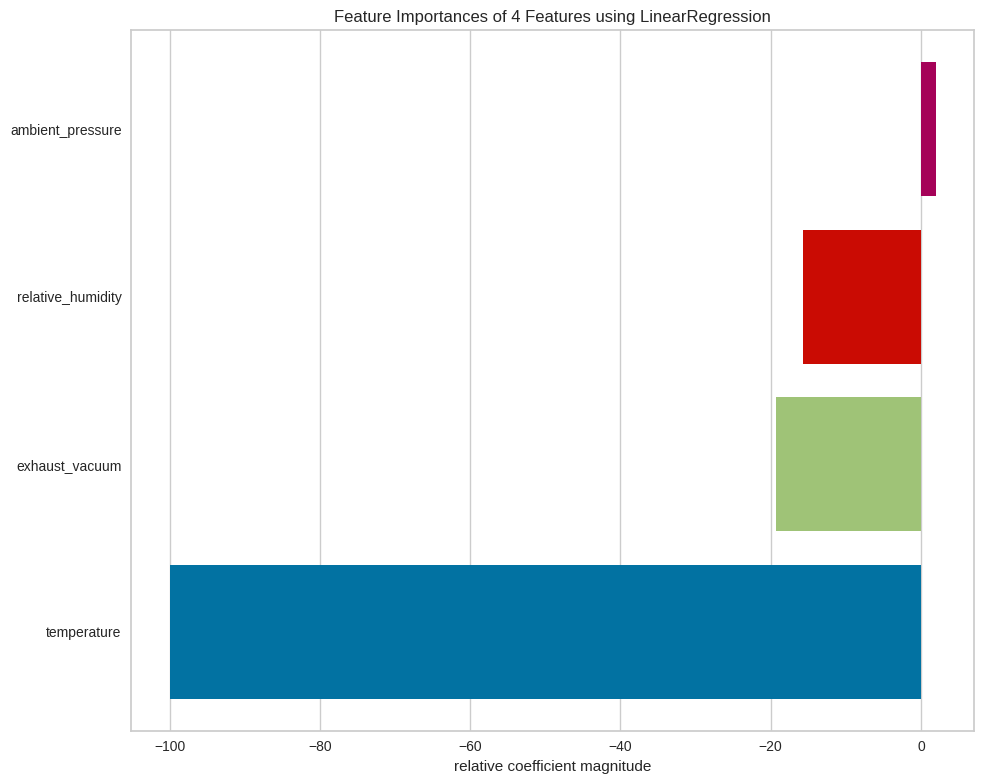

<AxesSubplot: title={'center': 'Feature Importances of 4 Features using LinearRegression'}, xlabel='relative coefficient magnitude'>

In [13]:
import matplotlib.pyplot as plt
from yellowbrick.features import FeatureImportances


'''
Se não aparecer barra, não tem importância
Se barra para direita, o aumento dessa variável aumenta o valor da saída
Se barra para esqueda, o aumento dessa variável diminui o valor da saída
'''


fig, ax = plt.subplots(figsize=(10, 8))
viz = FeatureImportances(reg, labels=X.columns)
viz.fit(X.values, y.values)
viz.show()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


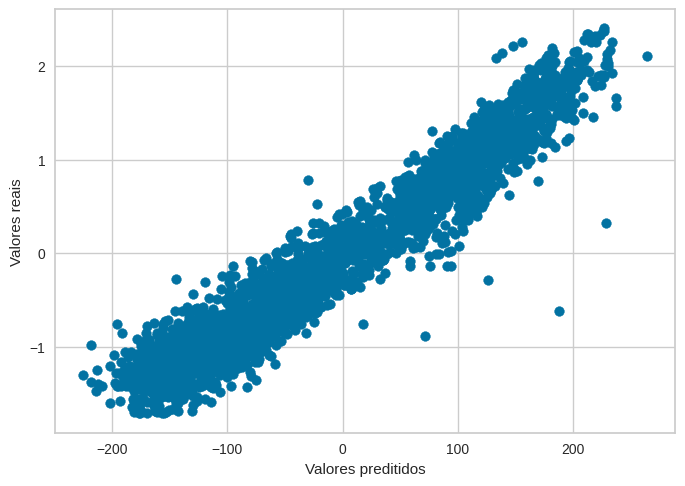

In [14]:
plt.scatter(reg.predict(X_test.values), y_test)

plt.xlabel("Valores preditidos")
plt.ylabel("Valores reais")


plt.show()

# Análise final e remoção de parâmetros

Após apresentado o resultado final correlacionando todos atributos com a variável de saída, realizamos a análise removendo cada parâmetro e vendo os resultados sem sua influência na análise.

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Resultados sem a coluna: temperature
Score: 0.8124696199515453


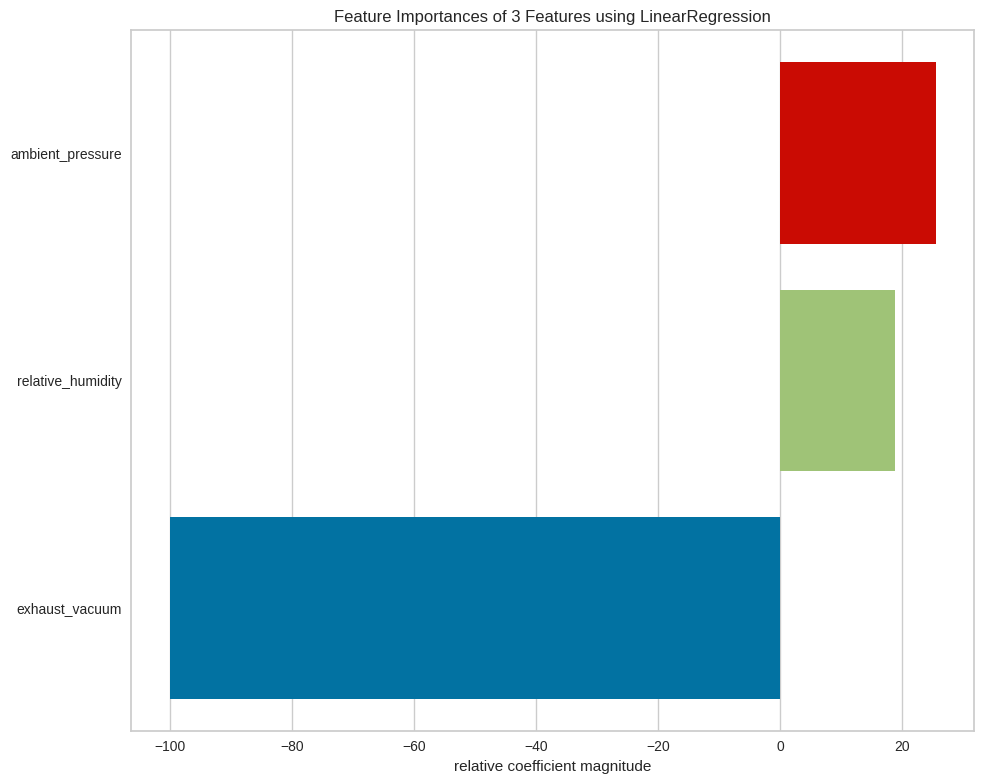

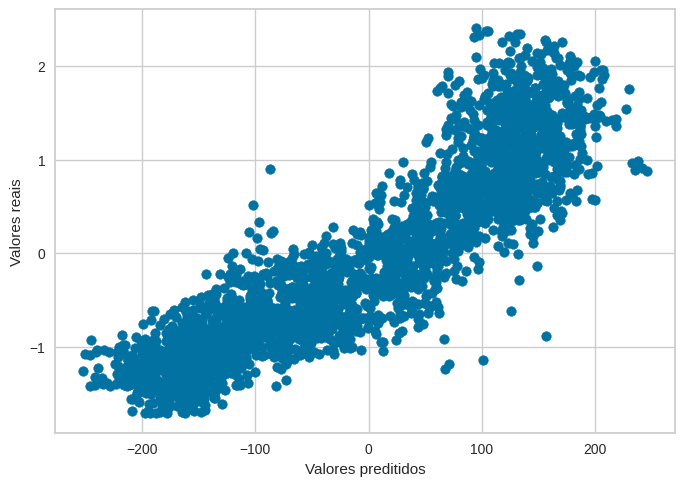




Resultados sem a coluna: exhaust_vacuum
Score: 0.9190314246140072


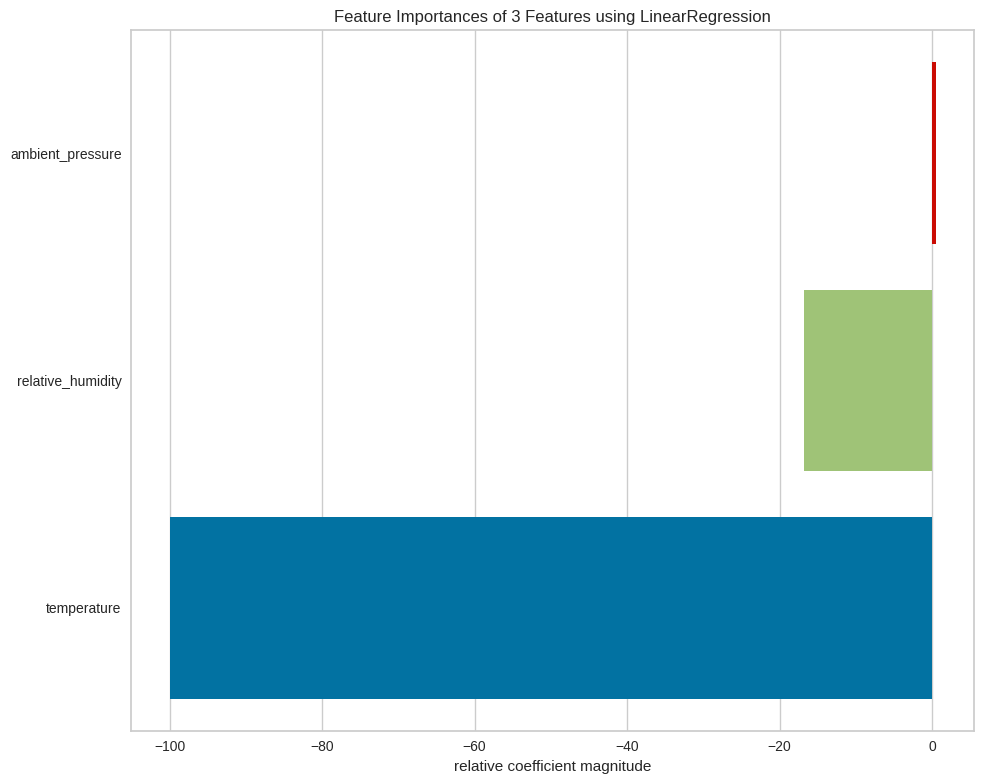

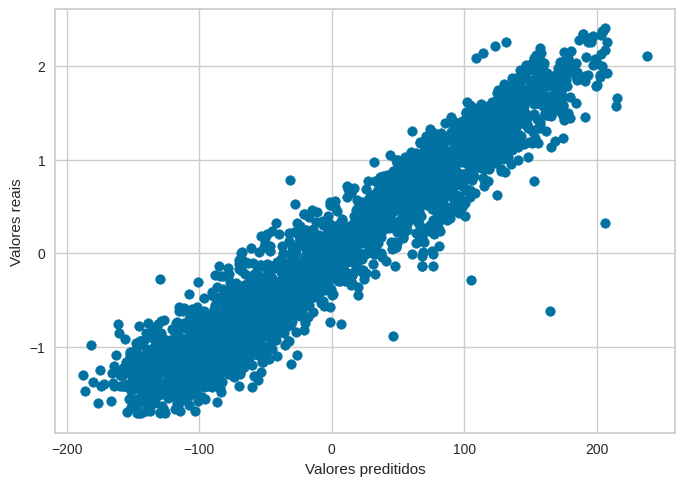




Resultados sem a coluna: ambient_pressure
Score: 0.9270059210787495


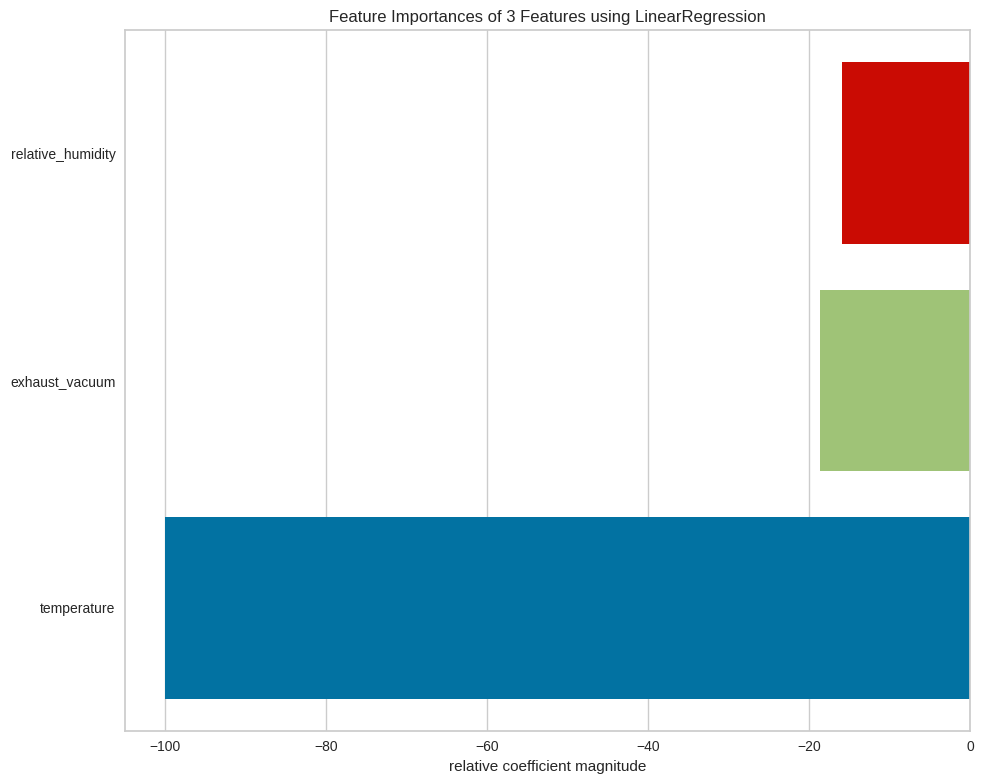

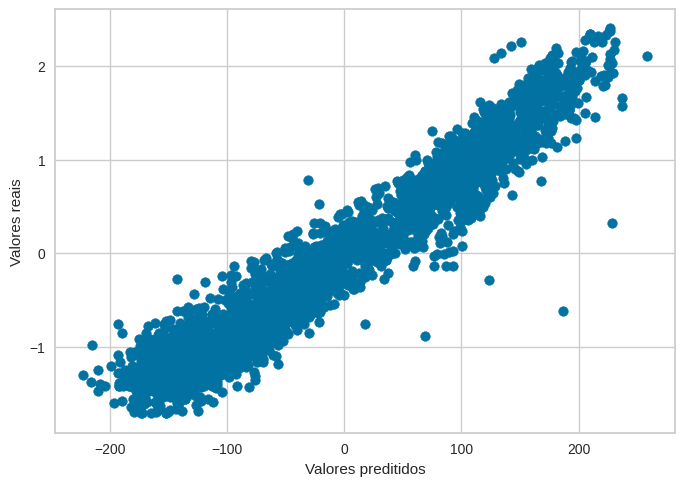




Resultados sem a coluna: relative_humidity
Score: 0.9176290179282053


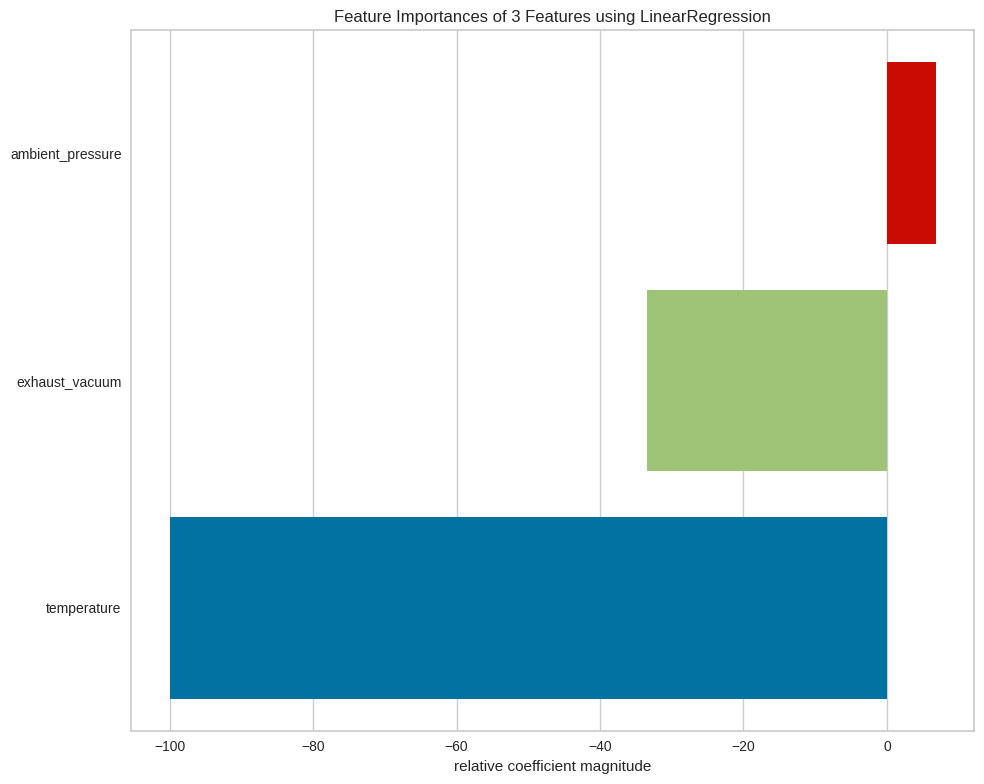

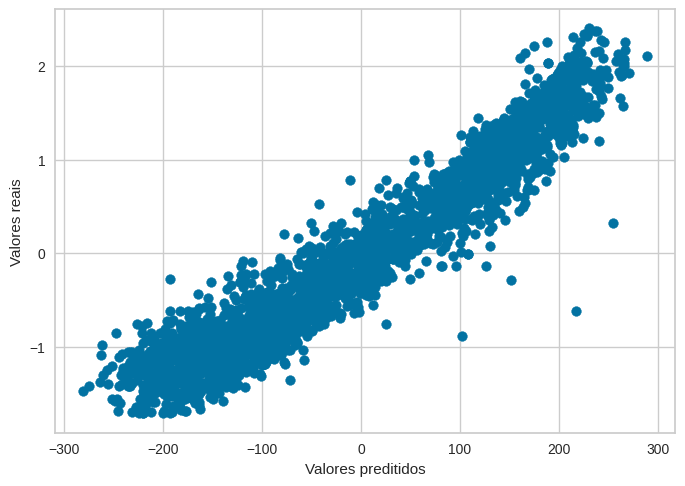

In [15]:
#@title Resultados removendo colunas de atributos individuais

for column_name in list(X.columns):
  # Remove a coluna da iteração atual do dataset
  X_without_column = X.drop([column_name], axis=1)

  # Separa os dados usando o mesmo random_state
  X_train, X_test, y_train, y_test = train_test_split(X_without_column, y, test_size=0.3, random_state=42)

  # Modelo de regressão linear para os novos dados de treino
  reg = LinearRegression()
  reg.fit(X_train.values, y_train.values)

  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1)

  print(f"Resultados sem a coluna: {column_name}\nScore: {reg.score(X_test.values, y_test.values)}")

  # Gráfico de barra de relações
  fig, axs = plt.subplots(figsize=(10, 8))
  viz = FeatureImportances(reg, labels=X_without_column.columns)
  viz.fit(X_without_column.values, y.values)
  
  viz.show()

  print("\n")

  # Gráfico de dispersão dos resultados obtidos
  plt.scatter(reg.predict(X_test.values), y_test)
  plt.xlabel("Valores preditidos")
  plt.ylabel("Valores reais")

  plt.show()

  print("\n\n")